https://www.kaggle.com/code/sonnyinkai369/ghuf-recsys

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as plt
import networkx as nx
import itertools
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load data

In [2]:
train_by_user = pd.read_csv("/kaggle/input/datahotel/train_total_by_user_38k1.csv")
test_by_user  = pd.read_csv("/kaggle/input/datahotel/test_by_user_695.csv")
train_by_user

,URL Hotel,Location,HotelID,Name Hotel,Descriptions,Address,UserID,User,Rating
0,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1187,Thảo,6
1,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",5866,Tho,6
2,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",3033,Tuan,9
3,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",1406,Phan,7
4,https://www.booking.com/hotel/vn/dalat-wind.vi...,Đà Lạt,4064,Dalat Wind Deluxe Hotel,"Tọa lạc tại thành phố Đà Lạt, cách Hồ Xuân Hươ...","Lot R2 03-04. Golf Valley, Ward 2, Đà Lạt, Viê...",841,Hong,8
...,...,...,...,...,...,...,...,...,...
38061,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",2190,Linh,6
38062,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1530,Anh,9
38063,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",1308,Phong,7
38064,https://www.booking.com/hotel/vn/littleboss.vi...,Huế,135,LittleBoss,Căn hộ có TV màn hình phẳng. Căn hộ nằm trong...,"The Manor Crown Đường Tố Hữu, TP Huêa, Huế, Vi...",6009,Hạnh,6


In [3]:
train = train_by_user.loc[:, ['UserID', 'HotelID', 'Rating']]
train = train.rename(columns={'UserID': 'UID', 'HotelID': 'MID', 'Rating': 'rate'})
train

,UID,MID,rate
0,1187,4064,6
1,5866,4064,6
2,3033,4064,9
3,1406,4064,7
4,841,4064,8
...,...,...,...
38061,2190,135,6
38062,1530,135,9
38063,1308,135,7
38064,6009,135,6


In [4]:
test = test_by_user.loc[:, ['UserID', 'HotelID', 'Rating']]
test = test.rename(columns={'UserID': 'UID', 'HotelID': 'MID', 'Rating': 'rate'})

In [5]:
df_user = pd.DataFrame(range(1, 6472), columns=['UID'])
df_user

,UID
0,1
1,2
2,3
3,4
4,5
...,...
6466,6467
6467,6468
6468,6469
6469,6470


# Finding Similarity graph between users, file trained below

In [ ]:
alpha_coefs = [1, 2, 3]

for alpha_coef in alpha_coefs:
    pairs = []
    grouped = train.groupby(['MID', 'rate'])
    for key, group in grouped:
        pairs.extend(list(itertools.combinations(group['UID'], 2)))
    counter = collections.Counter(pairs)
    alpha = alpha_coef * 1  # param*i_no
    edge_list = map(list, collections.Counter(el for el in counter.elements() if counter[el] >= alpha_coef).keys())
    G = nx.Graph()

    for el in edge_list:
        G.add_edge(el[0], el[1], weight=1)
        G.add_edge(el[0], el[0], weight=1)
        G.add_edge(el[1], el[1], weight=1)

    pr = nx.pagerank(G.to_directed())
    df_user['PR'] = df_user['UID'].map(pr)
    df_user['PR'] /= float(df_user['PR'].max())
    dc = nx.degree_centrality(G)
    df_user['CD'] = df_user['UID'].map(dc)
    df_user['CD'] /= float(df_user['CD'].max())
    cc = nx.closeness_centrality(G)
    df_user['CC'] = df_user['UID'].map(cc)
    df_user['CC'] /= float(df_user['CC'].max())
    bc = nx.betweenness_centrality(G)
    df_user['CB'] = df_user['UID'].map(bc)
    df_user['CB'] /= float(df_user['CB'].max())
    lc = nx.load_centrality(G)
    df_user['LC'] = df_user['UID'].map(lc)
    df_user['LC'] /= float(df_user['LC'].max())
    nd = nx.average_neighbor_degree(G, weight='weight')
    df_user['AND'] = df_user['UID'].map(nd)
    df_user['AND'] /= float(df_user['AND'].max())
    X_train = df_user[df_user.columns[1:]]
    X_train.fillna(0, inplace=True)

    X_train.to_pickle("x_train_alpha("+str(alpha_coef)+").pkl")


# Pretrain Similarity Graph

In [6]:
import pickle 

# Open the file in binary mode 
with open('/kaggle/input/feature-dataset/x_train_alpha(1).pkl', 'rb') as file: 
    # Call load method to deserialze 
    X_train = pickle.load(file) 

X_train

,PR,CD,CC,CB,LC,AND
0,0.018572,0.003058,0.000000,0.000000,0.000000,0.003253
1,0.011670,0.013761,0.683256,0.000009,0.000008,0.513988
2,0.007053,0.004587,0.532294,0.000000,0.000000,0.035784
3,0.009149,0.007645,0.619037,0.000000,0.000000,0.134678
4,0.034185,0.027523,0.675121,0.015761,0.016473,0.207656
...,...,...,...,...,...,...
6466,0.009075,0.007645,0.622470,0.000022,0.000126,0.164606
6467,0.008782,0.009174,0.680565,0.000000,0.000000,0.551399
6468,0.008954,0.007645,0.624147,0.000000,0.000000,0.181522
6469,0.010558,0.012232,0.692734,0.000004,0.000005,0.622154


# Creating User infor through description of items and rating of item

In [7]:
pip install transformers -q

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install underthesea -q

Note: you may need to restart the kernel to use updated packages.


In [9]:
import re

In [10]:
#Test thử phobert 
#from transformers import PhobertTokenizer, PhobertModel
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoModel, AutoTokenizer, PhobertTokenizer
import torch

#Chech if a GPU is available or not 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Khởi tạo tokenizer và mô hình PhoBERT
phobert = AutoModel.from_pretrained("vinai/phobert-base").to(device)
tokenizer = PhobertTokenizer.from_pretrained("vinai/phobert-base")


# Ví dụ câu cần so sánh
sentence1 = "Câu số 2 "
sentence2 = "Câu số 2 "

# Tokenize và chuyển đổi câu thành embeddings
tokens1 = tokenizer(sentence1, return_tensors="pt").to(device)
tokens2 = tokenizer(sentence2, return_tensors="pt").to(device)

with torch.no_grad():
    embeddings1 = phobert(**tokens1).last_hidden_state.mean(dim=1)
    embeddings2 = phobert(**tokens2).last_hidden_state.mean(dim=1)

# Tính cosine similarity giữa embeddings
similarity = cosine_similarity(embeddings1.cpu(), embeddings2.cpu())
print(f"Cosine Similarity: {similarity[0][0]}")


Cosine Similarity: 1.0


In [11]:
#Test thử underthesea
from underthesea import word_tokenize
sentence = 'Chàng trai 9X Quảng Trị khởi nghiệp từ nấm sò'

word_tokenize(sentence, format="text")
#output 'Chàng_trai 9X Quảng_Trị khởi_nghiệp từ nấm sò'

'Chàng trai 9X Quảng_Trị khởi_nghiệp từ nấm sò'

In [12]:
with open('/kaggle/input/stopword-vn/vietnamese.txt', 'r', encoding='utf-8') as file: 
    stopwordvn = file.readlines()
    list_stopword = list(set(w.strip() for w in stopwordvn))

In [13]:
#Xử lý lowecrcase, stopword 
def preprocessing_data(data):
    data = data.lower()
    #Xử lý dấu câu và ký tự đặc biệt
    data = re.sub(r"[^\w\s]", " ", data)
    #Loại bỏ stopword
    data = ' '.join([word for word in data.split() if word not in list_stopword])
    #Word segment
    data = word_tokenize(data, format='text')
    #Chuyển về wordembedding
    token = tokenizer(data, return_tensors='pt', max_length=256, truncation=True).to(device)
    with torch.no_grad():
        embedding = phobert(**token).last_hidden_state.mean(dim=1).cpu()
        
    return embedding

In [14]:
from tqdm import tqdm

In [16]:
user_infor = []
for i in tqdm(range(len(df_user))):  # Assuming user IDs start from 1
    user_rows = train_by_user[train_by_user['UserID'] == (i+1)]
    
    weighted_embeddings = [preprocessing_data(row['Descriptions']) * (row['Rating'] / 10) 
                             for _, row in user_rows.iterrows()]

    # Sum all weighted embeddings
    user_embed = sum(weighted_embeddings)[0] / len(weighted_embeddings)
    user_infor.append(user_embed)

100%|██████████| 6471/6471 [15:07<00:00,  7.13it/s]  


In [17]:
X_train['temp'] = user_infor
X_train

,PR,CD,CC,CB,LC,AND,temp
0,0.018572,0.003058,0.000000,0.000000,0.000000,0.003253,"[tensor(0.0398), tensor(0.1943), tensor(-0.147..."
1,0.011670,0.013761,0.683256,0.000009,0.000008,0.513988,"[tensor(-0.0198), tensor(0.1654), tensor(-0.15..."
2,0.007053,0.004587,0.532294,0.000000,0.000000,0.035784,"[tensor(0.0112), tensor(0.2671), tensor(-0.183..."
3,0.009149,0.007645,0.619037,0.000000,0.000000,0.134678,"[tensor(-0.0408), tensor(0.0604), tensor(-0.28..."
4,0.034185,0.027523,0.675121,0.015761,0.016473,0.207656,"[tensor(-0.0044), tensor(0.1949), tensor(-0.14..."
...,...,...,...,...,...,...,...
6466,0.009075,0.007645,0.622470,0.000022,0.000126,0.164606,"[tensor(0.0227), tensor(0.1492), tensor(-0.206..."
6467,0.008782,0.009174,0.680565,0.000000,0.000000,0.551399,"[tensor(0.0013), tensor(0.3039), tensor(-0.224..."
6468,0.008954,0.007645,0.624147,0.000000,0.000000,0.181522,"[tensor(-0.0530), tensor(0.2484), tensor(-0.16..."
6469,0.010558,0.012232,0.692734,0.000004,0.000005,0.622154,"[tensor(-0.0513), tensor(0.2001), tensor(-0.10..."


In [18]:
# Split the values in column 0 into 5 separate columns
b_split = X_train['temp'].apply(pd.Series)

# Rename the new columns if needed
b_split.columns = [f'col_{i+1}' for i in range(b_split.shape[1])]

# Concatenate the original DataFrame with the new columns
X_train = pd.concat([X_train, b_split], axis=1)

# Drop the original column 0
X_train = X_train.drop(columns=['temp'])

# Display the modified DataFrame
X_train

,PR,CD,CC,CB,LC,AND,col_1,col_2,col_3,col_4,...,col_759,col_760,col_761,col_762,col_763,col_764,col_765,col_766,col_767,col_768
0,0.018572,0.003058,0.000000,0.000000,0.000000,0.003253,0.039785,0.194260,-0.147697,-0.259220,...,-0.093428,-0.182588,0.109214,-0.047781,-0.067392,0.122219,-0.041941,0.017510,-0.096224,0.059193
1,0.011670,0.013761,0.683256,0.000009,0.000008,0.513988,-0.019812,0.165422,-0.158029,-0.174348,...,-0.215912,-0.186551,0.079743,-0.034228,-0.034259,0.065711,-0.039197,0.041675,-0.072014,0.106483
2,0.007053,0.004587,0.532294,0.000000,0.000000,0.035784,0.011232,0.267105,-0.183039,-0.184111,...,-0.095388,-0.122655,0.108182,0.029351,-0.071618,0.014966,-0.016752,0.068600,-0.075264,0.044765
3,0.009149,0.007645,0.619037,0.000000,0.000000,0.134678,-0.040790,0.060410,-0.287050,-0.065044,...,-0.229694,-0.244527,-0.159075,-0.058090,0.067797,0.040983,0.029965,-0.245558,-0.068751,0.146198
4,0.034185,0.027523,0.675121,0.015761,0.016473,0.207656,-0.004380,0.194902,-0.141272,-0.182257,...,-0.147032,-0.160699,0.098227,-0.018535,-0.056495,0.070841,-0.037389,0.007955,-0.061331,0.045412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,0.009075,0.007645,0.622470,0.000022,0.000126,0.164606,0.022695,0.149215,-0.206767,-0.180672,...,-0.161783,-0.210781,-0.006960,-0.057812,-0.014857,0.065997,-0.026375,-0.121365,-0.060271,0.102928
6467,0.008782,0.009174,0.680565,0.000000,0.000000,0.551399,0.001306,0.303944,-0.224241,-0.319853,...,-0.177468,-0.217359,0.177378,-0.004704,-0.078871,0.196696,-0.029527,-0.018769,-0.065537,-0.010804
6468,0.008954,0.007645,0.624147,0.000000,0.000000,0.181522,-0.053014,0.248443,-0.164549,-0.195408,...,-0.122757,-0.238269,0.178077,-0.081877,-0.066156,0.106635,-0.067659,0.039484,-0.051131,0.073790
6469,0.010558,0.012232,0.692734,0.000004,0.000005,0.622154,-0.051317,0.200102,-0.107836,-0.292410,...,-0.249159,-0.293107,0.172661,-0.034695,-0.087738,0.158267,-0.066331,0.097959,-0.087308,0.063492


# Building Autoencoder model

In [24]:
# Autoencoder for feature extraction
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import time

# Assuming you have loaded your dataset into a DataFrame 'df'
# Extract input features and target variable
X = X_train.to_numpy()

# Normalize input features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_normalized, dtype=torch.float32).to(device)

# Autoencoder Layer
class AutoencoderLayer(nn.Module):
    def __init__(self, n_in, n_hid, activation=nn.Sigmoid()):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_in, n_hid))
        nn.init.xavier_uniform_(self.W, gain=torch.nn.init.calculate_gain("relu"))
        self.b = nn.Parameter(torch.randn(n_hid))
        nn.init.zeros_(self.b)
        self.activation = activation
        
    def forward(self, x):
        y_hat = torch.matmul(x, self.W) + self.b
        y_hat = self.activation(y_hat)
        return y_hat

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, n_in, n_hid, n_layers):
        super().__init__()
        layers = []
        for i in range(n_layers):
            if i==0:
                layers.append(AutoencoderLayer(n_in, n_hid))
            else:
                layers.append(AutoencoderLayer(n_hid, n_hid))
        layers.append(AutoencoderLayer(n_hid, n_in, activation=nn.Identity()))
        self.layers = nn.ModuleList(layers)
        self.dropout = nn.Dropout(0.33)

    def forward(self, x):
        encoded_outputs = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers)-1:
                x = self.dropout(x)

        return x


# Loss function for autoencoder
class AutoencoderLoss(nn.Module):
    def forward(self, pred, target):
        return nn.functional.mse_loss(pred, target)

# Create and train the autoencoder
n_in = X_train_tensor.shape[1]  # Adjust the input dimension to match your dataset
n_hid = 500  # Adjust the hidden layer dimension
n_layers = 4  # Adjust the number of layers

autoencoder = Autoencoder(n_in, n_hid, n_layers).to(device)
loss_function = AutoencoderLoss()
optimizer = torch.optim.AdamW(autoencoder.parameters(), lr=0.001)

# Training loop
for epoch in range(900):
    autoencoder.train()
    optimizer.zero_grad()
    output = autoencoder(X_train_tensor)
    loss = loss_function(output, X_train_tensor)
    loss.backward()
    optimizer.step()

    # Print metrics or visualize if needed
    if epoch%100==0: 
        print(f'Epoch {epoch}/{300}, Loss: {loss.item()}')
        

Epoch 0/300, Loss: 1.696265459060669
Epoch 100/300, Loss: 0.7829895615577698
Epoch 200/300, Loss: 0.6664188504219055
Epoch 300/300, Loss: 0.6106245517730713
Epoch 400/300, Loss: 0.562984049320221
Epoch 500/300, Loss: 0.5329421758651733
Epoch 600/300, Loss: 0.5052564144134521
Epoch 700/300, Loss: 0.4751494824886322
Epoch 800/300, Loss: 0.4544077217578888


In [26]:
autoencoder.eval()
with torch.no_grad():
    encoded_features = autoencoder(torch.tensor(X, dtype=torch.float32).to(device))
    
encoded_features

tensor([[ 0.6171,  0.7351,  0.7410,  ...,  0.1310,  0.0017, -0.0096],
        [ 0.6150,  0.7267,  0.7416,  ...,  0.1192, -0.0189,  0.0133],
        [ 0.6154,  0.7330,  0.7393,  ...,  0.1362, -0.0056, -0.0098],
        ...,
        [ 0.6172,  0.7312,  0.7409,  ...,  0.1387,  0.0066,  0.0059],
        [ 0.6190,  0.7364,  0.7475,  ...,  0.1618,  0.0092, -0.0022],
        [ 0.6200,  0.7365,  0.7403,  ...,  0.1266,  0.0174, -0.0113]],
       device='cuda:0')

In [27]:
encoded_features = encoded_features.cpu().detach().numpy()
encoded_features.shape

(6471, 774)

In [28]:
encoded_features

array([[ 0.6171428 ,  0.73508024,  0.7410085 , ...,  0.13100147,
         0.00166907, -0.00964356],
       [ 0.6149507 ,  0.7267399 ,  0.7416254 , ...,  0.11922333,
        -0.01892978,  0.01327821],
       [ 0.61543125,  0.73296314,  0.7393127 , ...,  0.13615377,
        -0.00564252, -0.00982772],
       ...,
       [ 0.61719185,  0.7311796 ,  0.7408621 , ...,  0.13868645,
         0.00657494,  0.00590563],
       [ 0.6189643 ,  0.73644495,  0.74747396, ...,  0.16176349,
         0.00922369, -0.00224536],
       [ 0.62002313,  0.7365163 ,  0.74033886, ...,  0.12663096,
         0.01744959, -0.01130784]], dtype=float32)

# Clustering Users

Draw elbow score for finding best number of cluster

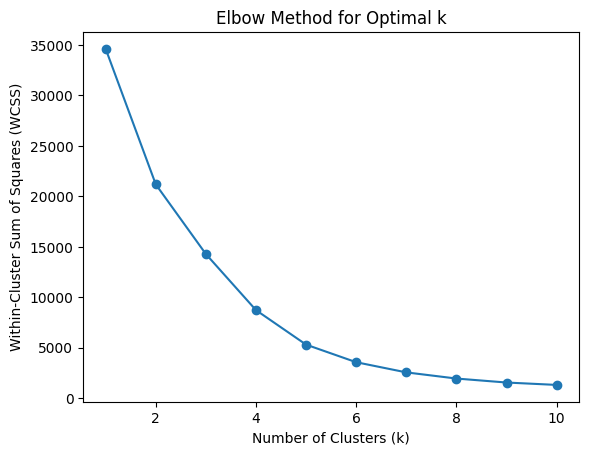

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Choose a range of values for k
k_values = range(1, 11)  # You can adjust this range based on your problem

# Fit k-means for each value of k and calculate WCSS
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(encoded_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [31]:
def kmeans_clustering(encoded_features, num_clusters):

    # Use K-means to cluster users
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(encoded_features)

    # Count the number of members in each cluster
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    
    # Print or return the counts
    for label, count in zip(unique_labels, counts):
        print(f'Cluster {label}: {count} members')

    return cluster_labels


In [32]:
num_clusters=5

In [33]:
cluster_labels = kmeans_clustering(encoded_features, num_clusters=num_clusters)
cluster_labels

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 2103 members
Cluster 1: 243 members
Cluster 2: 1212 members
Cluster 3: 2720 members
Cluster 4: 193 members


array([0, 3, 3, ..., 2, 2, 0], dtype=int32)

In [34]:
cluster_labels.shape

(6471,)

In [35]:
train.loc[:, 'cluster_label'] = cluster_labels[train['UID']-1]

In [36]:
train

,UID,MID,rate,cluster_label
0,1187,4064,6,3
1,5866,4064,6,0
2,3033,4064,9,3
3,1406,4064,7,0
4,841,4064,8,3
...,...,...,...,...
38061,2190,135,6,3
38062,1530,135,9,3
38063,1308,135,7,3
38064,6009,135,6,3


## Creating Item-cluster matrix

In [37]:
num_item = len(train['MID'].unique())
item_ratings = np.zeros((num_clusters, num_item))
item_ratings.shape

(5, 4506)

In [38]:
new_index = np.arange(1, 4507)
def compute_item_ratings(num_cluster, train):
    # Compute item ratings based on cluster similarity
    num_item = len(train['MID'].unique())
    item_ratings = np.zeros((num_cluster, num_item))
    for i, cluster_label in enumerate(range(num_cluster)):
        cluster_members = train[train['cluster_label'] == cluster_label]

        cluster_ratings = cluster_members.groupby('MID')['rate'].mean()
        item_ratings[i, :] = cluster_ratings.reindex(new_index, fill_value=0).reset_index()['rate']

    return item_ratings

In [39]:
item_ratings_matrix = compute_item_ratings(num_cluster=num_clusters, train=train)
item_ratings_matrix[:, 3]

array([7.5       , 0.        , 0.        , 6.83333333, 0.        ])

In [40]:
item_ratings_matrix.shape

(5, 4506)

Tạo ma trận user,những user thuộc cluster nào thì sẽ được đánh là 1

In [41]:
user_matrix = pd.DataFrame(cluster_labels, columns=['cluster_lable']).reset_index()
user_cluster_matrix = pd.get_dummies(user_matrix['cluster_lable']).astype(int).to_numpy()
user_cluster_matrix


array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [42]:
print(user_cluster_matrix.shape)

(6471, 5)


# Reconstructed Clusters rating by Autoencoder

In [56]:
def user_item_matrix(user_cluster_matrix, update_rating_matrix):
    result_dot = np.dot(user_cluster_matrix, update_rating_matrix)
    return result_dot

In [63]:
item_ratings_matrix

array([[7.        , 6.8       , 6.66666667, ..., 6.71414087, 7.36416604,
        6.        ],
       [4.999975  , 4.999975  , 4.99995   , ..., 5.17997162, 7.03711879,
        5.24044217],
       [8.64492378, 8.58695279, 8.58641657, ..., 9.        , 8.85829925,
        9.        ],
       [8.57142857, 7.2       , 9.        , ..., 7.        , 6.        ,
        9.375     ],
       [0.        , 0.        , 0.        , ..., 0.        , 8.52919412,
        0.        ]])

In [64]:
user_cluster_matrix

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [65]:
user_item = user_item_matrix(user_cluster_matrix, item_ratings_matrix)
user_item

array([[7.        , 6.8       , 6.66666667, ..., 6.71414087, 7.36416604,
        6.        ],
       [8.57142857, 7.2       , 9.        , ..., 7.        , 6.        ,
        9.375     ],
       [8.57142857, 7.2       , 9.        , ..., 7.        , 6.        ,
        9.375     ],
       ...,
       [8.64492378, 8.58695279, 8.58641657, ..., 9.        , 8.85829925,
        9.        ],
       [8.64492378, 8.58695279, 8.58641657, ..., 9.        , 8.85829925,
        9.        ],
       [7.        , 6.8       , 6.66666667, ..., 6.71414087, 7.36416604,
        6.        ]])

In [66]:

# Convert data to PyTorch tensors
user_item_train_tensor = torch.tensor(user_item, dtype=torch.float32).to(device)

# Autoencoder Layer
class AutoencoderLayer(nn.Module):
    def __init__(self, n_in, n_hid, activation=nn.Sigmoid()):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_in, n_hid))
        nn.init.xavier_uniform_(self.W, gain=torch.nn.init.calculate_gain("relu"))
        self.b = nn.Parameter(torch.randn(n_hid))
        nn.init.zeros_(self.b)
        self.activation = activation
        
    def forward(self, x):
        y_hat = torch.matmul(x, self.W) + self.b
        y_hat = self.activation(y_hat)
        return y_hat

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, n_in, n_hid, n_layers):
        super().__init__()
        layers = []
        for i in range(n_layers):
            if i==0:
                layers.append(AutoencoderLayer(n_in, n_hid))
            else:
                layers.append(AutoencoderLayer(n_hid, n_hid))
        layers.append(AutoencoderLayer(n_hid, n_in, activation=nn.Identity()))
        self.layers = nn.ModuleList(layers)
        self.dropout = nn.Dropout(0.33)

    def forward(self, x):
        encoded_outputs = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers)-1:
                x = self.dropout(x)

        return x


# Loss function for autoencoder
class AutoencoderLoss(nn.Module):
    def forward(self, pred, target):
        return nn.functional.mse_loss(pred, target)

# Create and train the autoencoder
n_in = user_item_train_tensor.shape[1]  # Adjust the input dimension to match your dataset
n_hid = 500  # Adjust the hidden layer dimension
n_layers = 3  # Adjust the number of layers

autoencoder_2 = Autoencoder(n_in, n_hid, n_layers).to(device)
loss_function = AutoencoderLoss()
optimizer = torch.optim.AdamW(autoencoder_2.parameters(), lr=0.001)

# Training loop
for epoch in range(900):
    autoencoder.train()
    optimizer.zero_grad()
    output = autoencoder_2(user_item_train_tensor)
    loss = loss_function(output, user_item_train_tensor)
    loss.backward()
    optimizer.step()

    # Print metrics or visualize if needed
    if epoch%100==0: 
        print(f'Epoch {epoch}/{300}, Loss: {loss.item()}')

Epoch 0/300, Loss: 54.09618377685547
Epoch 100/300, Loss: 2.116138458251953
Epoch 200/300, Loss: 2.061190366744995
Epoch 300/300, Loss: 2.018712043762207
Epoch 400/300, Loss: 1.9616962671279907
Epoch 500/300, Loss: 1.8965930938720703
Epoch 600/300, Loss: 1.8476593494415283
Epoch 700/300, Loss: 1.7980438470840454
Epoch 800/300, Loss: 1.7577873468399048


In [67]:
autoencoder_2.eval()
with torch.no_grad():
    reconstructed_rating_matrix = autoencoder_2(user_item_train_tensor)

reconstructed_rating_matrix = reconstructed_rating_matrix.cpu().detach().numpy()
reconstructed_rating_matrix

array([[7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666],
       [7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666],
       [7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666],
       ...,
       [7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666],
       [7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666],
       [7.9059944, 7.229908 , 7.967144 , ..., 7.19961  , 7.099514 ,
        7.9904666]], dtype=float32)

# Evaluation

In [59]:
def get_list_4test(user_rating_matrix, test):
    test_list = []
    for i in range(test.shape[0]):
        rating = user_rating_matrix[test.iloc[i]['UID'] - 1][test.iloc[i]['MID'] - 1]
        test_list.append(rating)
    
    return test_list

In [70]:
test_list = get_list_4test(reconstructed_rating_matrix, test)
test_list[:10]

[7.310478,
 7.660228,
 7.660228,
 7.461893,
 7.2107406,
 7.310478,
 6.6988277,
 7.651812,
 7.651812,
 7.8313055]

In [71]:
ground_truth = test['rate'].values
ground_truth[:10]

array([5, 6, 7, 8, 7, 6, 8, 6, 6, 7])

> MSE

In [72]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ground_truth , test_list)
print('MSE =',mse)

MSE = 2.3796817631860097


RMSE

In [73]:
import math
rmse = math.sqrt(mse)
print('RMSE =',rmse)     

RMSE = 1.5426217174621941


MAE

In [74]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ground_truth , test_list)
print('MAE =',mae)

MAE = 1.3172599648400176


NMAE

In [75]:
MAX = max(test['rate'].tolist())
MIN = min(test['rate'].tolist())

nmae = mae/(MAX-MIN)
print('----- NMAE =',nmae)

----- NMAE = 0.21954332747333627


# Lưu lại kết quả

In [ ]:
with open('best_ghrs.pkl', 'wb') as file:
    pickle.dump(reconstructed_rating_matrix, file)